In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use('fivethirtyeight')

#### Here we import our static functions

These functions are defined in the attached python files *code/portfolio_functions.py* and *code/portfolio_charts.py*

In [2]:
from portfolio_functions import *
from portfolio_charts import *

----

# Portfolio Management Final Report 


----


### Presented by:
- Maxime Gosselin (6377716)
- Jonathan Abenaim (8815366)
- Nam Hoang (8585961)
- Matthew Killeen (8173969)
- Jasdeep Punia (8588334)
- Pierre-André Smith (8761654)
    


#### Objective
Given our selected portfolio of 60 securities we aim to plot the efficient frontier of possible portfolio combinations
    
#### Selected Securities

Tickers:

- BIDU, LULU, UL, RDS/A, RY,
- NVS, CP, GOLD, GIB, NGG,
- GOOGL, HD, WMT, VLO, JPM,
- JNJ, BA, DWDP, INTC, NEE, 
- HYG, CELG, MNST, VRML, EA,
- PGF, EMB, MDLZ, LMT, AMD


## Portfolio Data
----

What follows is the excess return data for our portfolio of thirty stocks over the 60 months studied.

In [3]:
xs_data = pd.read_csv("xsreturns_data.csv", header=0,)
portfolio_constituents = xs_data.columns

----
Let's plot the excess returns to get a rough visualisation of our portfolio's makeup

#### Excess returns and portfolio statistics

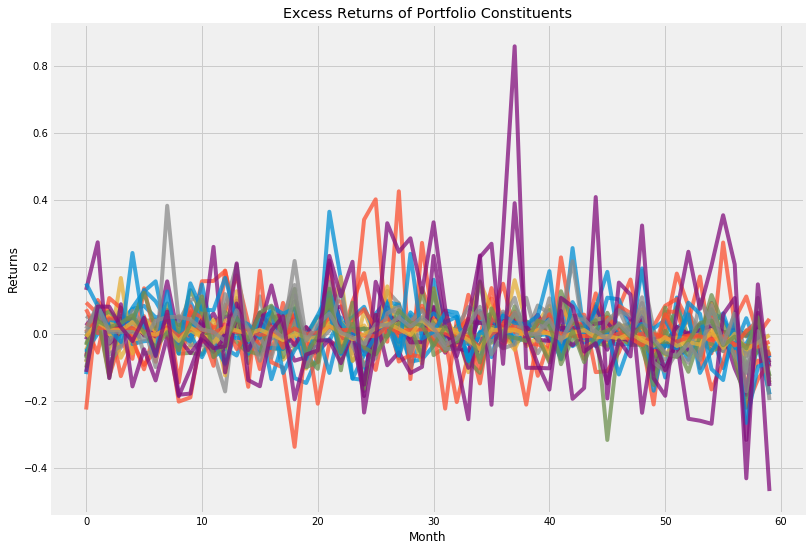

,BIDU,LULU,UL,RDS/A,RY,NVS,CP,GOLD,GIB,NGG,...,HYG,CELG,MNST,VRML,EA,PGF,EMB,MDLZ,LMT,AMD
Avg,-0.003252,0.012076,0.002037,-0.002388,-0.000980,-0.000933,-0.000478,0.000502,0.005696,-0.006076,...,-0.003558,-0.006166,0.010926,-0.021917,0.018926,-0.000665,-0.002387,-0.001002,0.007269,0.034975
SD,0.099281,0.108110,0.050789,0.057629,0.052548,0.046006,0.062704,0.144582,0.055497,0.046757,...,0.016650,0.092511,0.091210,0.200334,0.093252,0.016210,0.019652,0.051294,0.052518,0.172962


In [4]:
xs_stats = pd.read_csv("xsreturns_stats.csv", header=0, index_col=0)
xs_avg = xs_stats.loc['Avg']
xs_avg

returns_chart(xs_data, xs_avg)
xs_stats

## Computing the covariance matrix

In [5]:
covariance_matrix = xs_data.cov()
covariance_matrix

,BIDU,LULU,UL,RDS/A,RY,NVS,CP,GOLD,GIB,NGG,...,HYG,CELG,MNST,VRML,EA,PGF,EMB,MDLZ,LMT,AMD
BIDU,0.009857,-0.000762,0.001130,0.002325,0.002186,0.000333,0.002164,0.001040,0.001891,0.000619,...,0.000681,0.002797,0.001927,0.001370,0.002337,0.000291,0.000675,0.001318,0.001722,0.003446
LULU,-0.000762,0.011688,0.000344,0.000397,0.000203,0.000336,-0.000160,0.001091,0.000773,-0.000731,...,0.000118,0.001704,0.000722,0.002665,-0.000653,0.000109,-0.000127,0.000051,-0.000412,0.004551
UL,0.001130,0.000344,0.002579,0.000970,0.000579,0.001377,0.000218,0.001548,0.000328,0.001563,...,0.000413,0.001459,0.001458,0.002528,0.001657,0.000307,0.000521,0.001167,0.000674,0.002004
RDS/A,0.002325,0.000397,0.000970,0.003321,0.001780,0.000693,0.001506,0.003201,0.000348,0.000668,...,0.000552,0.000720,0.001038,0.001292,0.000459,0.000016,0.000428,0.000788,0.000851,0.002415
RY,0.002186,0.000203,0.000579,0.001780,0.002761,0.000673,0.002017,0.000956,0.000981,0.000398,...,0.000452,0.001356,0.001228,0.002067,0.000115,0.000082,0.000375,0.000965,0.000950,0.003857
NVS,0.000333,0.000336,0.001377,0.000693,0.000673,0.002117,0.000646,-0.000151,0.000009,0.000912,...,0.000355,0.001789,0.002026,0.001472,0.001315,0.000184,0.000372,0.001304,0.001010,0.002221
CP,0.002164,-0.000160,0.000218,0.001506,0.002017,0.000646,0.003932,-0.000093,0.001149,0.000251,...,0.000426,0.001473,0.001771,0.003348,-0.000070,0.000086,0.000252,0.000067,0.001188,0.002344
GOLD,0.001040,0.001091,0.001548,0.003201,0.000956,-0.000151,-0.000093,0.020904,-0.000286,0.001403,...,0.000654,-0.000993,-0.000860,-0.000412,-0.001781,0.000069,0.000867,-0.000440,-0.001280,0.000787
GIB,0.001891,0.000773,0.000328,0.000348,0.000981,0.000009,0.001149,-0.000286,0.003080,0.000267,...,0.000148,0.000642,0.000979,0.000722,0.000297,0.000162,0.000152,0.000223,0.000279,0.002284
NGG,0.000619,-0.000731,0.001563,0.000668,0.000398,0.000912,0.000251,0.001403,0.000267,0.002186,...,0.000298,0.000485,0.001261,0.000935,0.001374,0.000319,0.000439,0.000990,0.000305,-0.000541


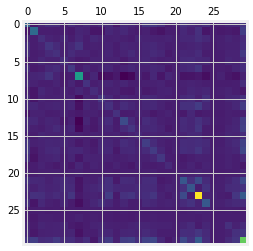

In [6]:
plt.matshow(covariance_matrix)
plt.show()

----


### Monte Carlo Simulation of Portfolios

For the purposes of illustration we wanted to generate some portfolios to lie under the efficient frontier.

To accomplish this we simply randomly generate a set of portfolios.

In [7]:
# MONTE CARLO Random Simulation of ports

# Set how many times will the simulation run
ITERATIONS = 10000

# We want to save data for each simulation under these headers
save_columns = ['Return', 'Standard Deviation', 'Sharpe Ratio', 'Weights']
monte_carlo_portfolios = pd.DataFrame(simulate_portfolios(ITERATIONS, xs_stats, covariance_matrix))

In [8]:
monte_carlo_portfolios[(['return', 'sharpe', 'stdv', 'weights'])]

,return,sharpe,stdv,weights
0,0.000763,0.021961,0.034753,"[0.02734064854955471, 0.024270940319421782, 0...."
1,0.006127,0.169362,0.036174,"[0.02918308592864001, 0.03785972920701812, 0.0..."
2,0.002677,0.076918,0.034800,"[0.03390424111660276, 0.003000928588667631, 0...."
3,0.003906,0.097424,0.040097,"[0.0537621144051706, 0.04050325028721841, 0.01..."
4,0.003511,0.107352,0.032705,"[0.010861717471690466, 0.0007457637625315883, ..."
5,0.003088,0.098665,0.031297,"[0.03495294142884427, 0.011849694157662018, 0...."
6,0.001239,0.037757,0.032826,"[0.05063238871044094, 0.06238512375621255, 0.0..."
7,0.003420,0.100575,0.034001,"[0.05694414754864374, 0.020031289782492516, 0...."
8,0.005466,0.159231,0.034326,"[0.016580355758378997, 0.0464426724896018, 0.0..."
9,0.006113,0.170035,0.035949,"[0.028013893652103498, 0.004466206781504756, 0..."


## Minumum Variance and Maximum Sharpe Ratio Portfolios

Using scipy's optimizer as a (far superior) replacement for Excel's Solver we solve for the desired portfolios

----

#### Minimum Variance

In [20]:
 minvar_metrics = portfolio_metrics(minvar_optimization['x'], xs_avg, covariance_matrix)
f"Return: {minvar_metrics['return']}, Sharpe: {minvar_metrics['sharpe']}, sigma: {minvar_metrics['stdv']}"

'Return: 0.0007473716587227787, Sharpe: 0.0445382904358727, sigma: 0.01678042985953541'

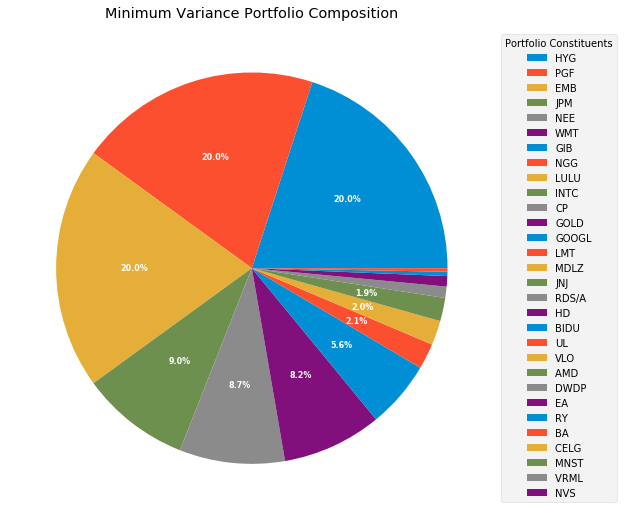

In [10]:
minpie = pd.DataFrame(minvar_metrics['weights'], columns=["Tickers"], index=portfolio_constituents)
minpie.sort_values(by=["Tickers"], inplace=True, ascending=False)
portfolio_pie(minpie['Tickers'], minpie.index, "Minimum Variance Portfolio Composition")

----

#### Maximum Sharpe Ratio

In [21]:
maxsharpe_optimization = solve_maxsharpe(xs_avg, covariance_matrix)
maxsharpe_metrics = portfolio_metrics(maxsharpe_optimization['x'], xs_avg, covariance_matrix)
f"Return: {maxsharpe_metrics['return']}, Sharpe: {maxsharpe_metrics['sharpe']}, sigma: {maxsharpe_metrics['stdv']}"

'Return: 0.012537689953378426, Sharpe: 0.33535918342018634, sigma: 0.037385855444636504'

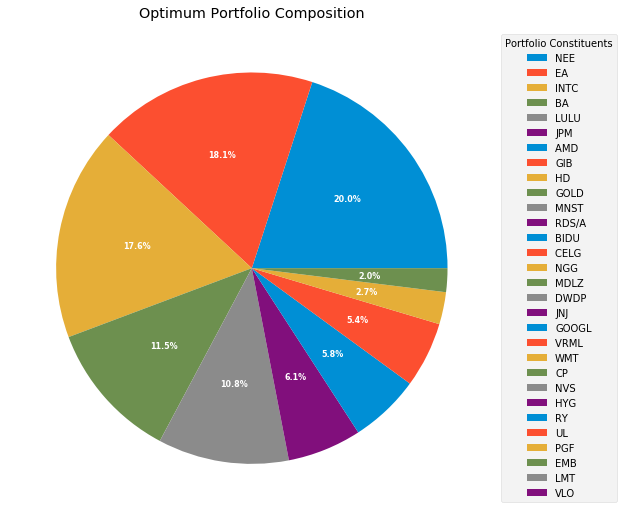

In [22]:
maxsharppie = pd.DataFrame(maxsharpe_metrics['weights'], columns=["Tickers"], index=portfolio_constituents)
maxsharppie.sort_values(by=["Tickers"], inplace=True, ascending=False)

portfolio_pie(maxsharppie['Tickers'], maxsharppie.index, "Optimum Portfolio Composition")

----

## Plotting the efficient frontier


#### We first compute the range bewteen our minimum variance and maximum sharpe portfolios

In [23]:
mv_ms_distance = maxsharpe_metrics['return'] - minvar_metrics['return']

mv_ms_distance

0.011790318294655648

In [24]:
start = minvar_metrics['return'] - (0.35 * mv_ms_distance)
optimum = maxsharpe_metrics['return']
end = optimum + (0.65 * mv_ms_distance)

# Range
start, optimum, end

(-0.0033792397444066978, 0.012537689953378426, 0.020201396844904598)

In [25]:
# Join two ranges to make sure we hit the optimum port.
total_distance = end - start
r1_distance = optimum - start
r2_distance = end - optimum

#### Now we know where to plot let's choose our targets

In [26]:
portfolios_to_generate = 1000
r1_portfolios = int((r1_distance / total_distance) * portfolios_to_generate)
r2_portfolios = int((r2_distance / total_distance) * portfolios_to_generate)

r1 = np.linspace(start, optimum, r1_portfolios)
r2 = np.linspace(optimum, end, r2_portfolios, endpoint=True)

targets = np.concatenate((r1, r2))

----

## Generate the efficient portfolios

For each target return we run the optimizer and store the results in efficient_data

In [ ]:
efficient_portfolios = generate_efficient_frontier(targets, xs_avg, covariance_matrix)
efficient_data = pd.DataFrame(efficient_portfolios)
efficient_data

Backup our data to csv

In [ ]:
efficient_data.to_csv('eff_ports_data.csv')

Adding the Capital Allocation Line

In [ ]:
cal_x = np.linspace(-0.01, 0.07)
cal_y = cal_x * maxsharpe_metrics['sharpe']

### Ploting the CAL, Efficient frontier, and Monte Carlo Portfolios together

In [ ]:
graph_together(monte_carlo_portfolios, efficient_data, maxsharpe_metrics, minvar_metrics, cal_x, cal_y)